In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")

<img src=metrics_1.png>

<img src=metrics_2.png>

<h1> Performance Metrics </h1>

The choice of metrics for evaluating a model is of the utmost importance. We will tune the model, select hyperparameters and choose a particular algorithm among others, according to this metrics. 

In this notebook we will focus on two of the main machine learning problems and we will discuss the metrics associated with them:
<blockquote>
        <ul style="list-style-type:none;">
            <li> <b>1) Classification problems.</b> We will continue to use the Pima Indias onset diabetes dataset that we have been using so far. In this dataset all attributes are numeric and its a binary classification problem.</li> 
            <br>
            <li> <b>2) Regression problems.</b> For regression we will use also a very traditional dataset, the Boston House Price. Again all input variables are numeric.</li>
        </ul>
</blockquote>

Obviously not all problems in machine learning can be categorized as regression or classification problems, we also have clustering, association rules, topic modeling, etc... However, classification and regression remain as the most substantial ones. 

# CLASSIFICATION METRICS

Classification is probably the most common problem in machine learning and many problems can be reduced to a classification problem. 

Here, we will review the following metrics:

            1) Accuracy. 
            2) Logarithmic loss.
            3) Area under ROC curve.
            4) Confusion matrix.
            5) Classification Report. 
        
using our already familiar Pima Indians diabetes dataset. 


<img src="Pima_indians_cowboy_1889.jpg">

In this exercise we will use one of the traditional Machine Learning dataset, the Pima Indians diabetes dataset.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, <b>Outcome</b>. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<blockquote>
        <ul style="list-style-type:square;">
            <li>Pregnancies</li> 
            <li>Glucose</li>
            <li>BloodPressure</li>
            <li>SkinThickness</li>
            <li>Insulin</li>
            <li>BMI</li>
            <li>DiabetesPedigreeFunction (scores de likelihood of diabetes based on family history)</li>
            <li>Age</li>
            <li>Outcome</li>
        </ul>
</blockquote>

In [2]:
# Load the Pima indians dataset and separate input and output components 

from numpy import set_printoptions
set_printoptions(precision=3)

filename="pima-indians-diabetes.data.csv"
names=["pregnancies", "glucose", "pressure", "skin", "insulin", "bmi", "pedi", "age", "outcome"]
p_indians=pd.read_csv(filename, names=names)
p_indians.head()

# First we separate into input and output components
array=p_indians.values
X=array[:,0:8]
y=array[:,8]
np.set_printoptions(suppress=True)
X
pd.DataFrame(X).head()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


<h1>Classification Accuracy, Precision, Recall, F1 and Precision/Recall curves </h1>

Accuracy is the ratio of correct predictions over all predictions. It is by far the most used metrics. 

However, it is only suitable when classes are balanced and errors in each class are equally important. For example whe it is equally important to missclassify a healthy person as having cancer (Type I) or a sick one as healty (Type II). As you can guess, in many cases this is not the case and accuracy is many times misused. 


,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Logistic regression, k-fold 10 - Accuracy 76.951% (4.841%)
Logistic regression, k-fold 10 - Accuracy 76.951%       Precision 72.733%       Recall 54.327%       F1 61.846%


PrecisionRecallCurve(ap_score=True,
                     ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F579975E80>,
                     classes=None, encoder=None, fill_area=True,
                     fill_opacity=0.2, force_model=False, is_fitted='auto',
                     iso_f1_curves=False, iso_f1_values={0.2, 0.4, 0.6, 0.8},
                     line_opacity=0.8, micro=True, model=None, per_class=False)

0.7100294499913706

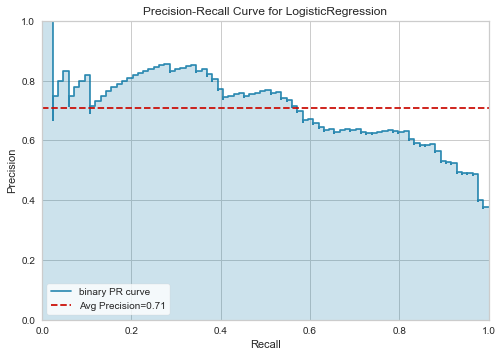

In [3]:
# Accuracy
#F1 average (precision,recall)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from yellowbrick.classifier import PrecisionRecallCurve

p_indians.head()

# KFold
splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="accuracy"


#Logistic regression
model = LogisticRegression(solver='liblinear')

# Obtain the performance measure - accuracy
results = cross_val_score(model, X, y, scoring=scoring, cv=kfold)

print(f'Logistic regression, k-fold {splits:d} - Accuracy {results.mean()*100:.3f}% ({results.std()*100:.3f}%)')

# let's get precision, recall and f1 too

scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1'}

results = cross_validate(model, X, y, scoring=scoring, cv=kfold)
print(f'Logistic regression, k-fold {splits:d} - Accuracy {results["test_accuracy"].mean()*100:.3f}% \
      Precision {results["test_precision"].mean()*100:.3f}% \
      Recall {results["test_recall"].mean()*100:.3f}% \
      F1 {results["test_f1"].mean()*100:.3f}%')


# Precision & Recall Curve
test_size=0.3
seed=7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

viz=PrecisionRecallCurve(model)
viz.fit(X_train, y_train)
viz.score(X_test,y_test)
viz.show()


<h1>Logarithmic Loss</h1>

Logarithmic loss (or logloss) is a performance metric for evaluating predictions of probabilities of membership to a clas as a scalar between 0 and 1 that is seen as a measure of confidence. 

Correct and incorrect predictions are rewarded or punished according to the confidence on the prediction. 
Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value.The penalty is logarithmic, offering a small penalty for small differences (0.1 or 0.2) and a large one for a large difference (0.9 or 1.0).

cross_val_score inverts (expressing the inversion with a - sign) the measure, therefore 0 is better. 

In [4]:
# Logarithmic Loss

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

p_indians.head()

# KFold
splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="neg_log_loss"

#Logistic regression
model = LogisticRegression(solver='liblinear')

# Obtain the performance measure - accuracy
results = cross_val_score(model, X, y, scoring=scoring, cv=kfold)

print(f'Logistic regression, k-fold {splits:d} - Logloss {results.mean():5.3f} ({results.std():5.3f})')


,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Logistic regression, k-fold 10 - Logloss -0.493 (0.047)


In [5]:
# // LI FAW2OUN NOT VERY GOOD

<img src="AUC.png">

<h1>Area under ROC curve</h1>

Area under the ROC curve (AUC for short) is a metric used in binary classifications. 

It represents the ability of the model to discriminate between positive and negative classes. An AUC of 0.5 represents a model that is as good as random, while an area of 1 represents a perfect model. 

The area under the curve can be broken down into two metrics: sentitivity (recall) and specificity. In general any binary classification problem is a tradeoff between these two measures. 

        - Sensitivity (True positive rate or recall). Represents the number of instances of the positive class that were correctly classified. 
        - Specificity (True negative rate). Number of instances of the negative class classified correctly. 


,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Logistic regression, k-fold 10 - AUC 0.823 (0.041)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F579CB8940>,
       classes=[0, 1], encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

0.8313824679531676

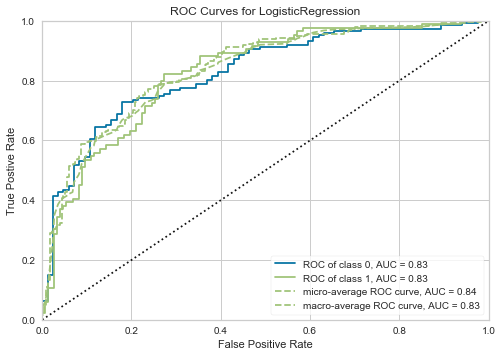

In [6]:
# Area under ROC curve

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ROCAUC

p_indians.head()

# KFold
splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="roc_auc"

#Logistic regression
model = LogisticRegression(solver='liblinear')

# Obtain the performance measure - accuracy
results = cross_val_score(model, X, y, scoring=scoring, cv=kfold)

print(f'Logistic regression, k-fold {splits:d} - AUC {results.mean():5.3f} ({results.std():5.3f})')

# ROC curve
test_size=0.3
seed=7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

viz=ROCAUC(model, classes=[0,1])
viz.fit(X_train, y_train)
viz.score(X_test,y_test)
viz.show()


<img src="confusionMatrix.jpg">

<h1>Confusion Matrix </h1>

The confusion matrix is a presentation of the accuracy of the model in its four classes: True Positives, False Positives, False Negatives and True Negatives. 

From it we can easily derive Precision, Recall, Specificity and Accuracy. 


,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[130  17]
 [ 38  46]]

Accuracy 76.19048
Accuracy check with conf. matrix 76.19048


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.7619047619047619

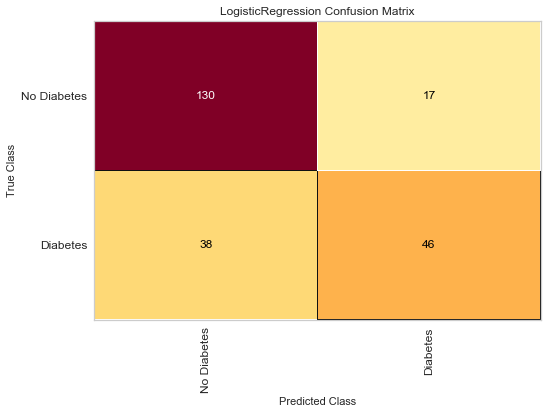

In [7]:
# Confusion Matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


p_indians.head()

test_size=0.3
seed=7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

c_matrix=confusion_matrix(y_test, y_predicted)

print("Confusion Matrix")
print(c_matrix)

print()
print(f'Accuracy {model.score(X_test, y_test)*100:.5f}')
print(f'Accuracy check with conf. matrix {(c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()*100:.5f}')


#using yellowbrick

cm = ConfusionMatrix(model, classes=["No Diabetes","Diabetes"])
# cm.fit(X_train, y_train)  #only if the model is not fitted

cm.score(X_test, y_test)
cm.show()



<h1>Classification Report</h1>

The scikit-learn library provides a report that is convenient and useful in terms of summarizing many of the measures that are commonly used together with accuracy. 

For each class it presents:
<blockquote>
1) Precision. $Precision = \frac{True Positives}{True Positives + False Posities}$

2) Recall (also known as Sensitivity). $Recall = \frac{True Positives}{True Positivies + False Negatives}$

3) F1 score. It's the harmonic mean of precision and recall. $F1 = 2 ·\frac{precision · recall}{precision + recall}$    , provides a good balance between precision and recall when classes are unevenly distributed. Best is 1, worst is 0.   

4) Support. It's the number of elements of each class in Y_test.

</blockquote>
The reported averages include:

        1) Macro average. Averaging the unweighted mean per label. 
        2) Weighted average. Averaging the support-weighted mean per label. 
        3) Sample average. Only for multilabel classification. 
        4) Micro average. Accuracy for a binary classification. Averaging the total true positives, false negatives and false positives.

In [8]:
# Classification Report 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

p_indians.head()

test_size=0.3
seed=7

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

report = classification_report(Y_test, Y_predicted, digits=5)


print(f'Accuracy {model.score(X_test, Y_test)*100:.5f}')
print()
print(report)



,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy 76.19048

              precision    recall  f1-score   support

         0.0    0.77381   0.88435   0.82540       147
         1.0    0.73016   0.54762   0.62585        84

    accuracy                        0.76190       231
   macro avg    0.75198   0.71599   0.72562       231
weighted avg    0.75794   0.76190   0.75283       231



<b><font color="red" size=6>Mission 1</font>

We will use our predictions for top-10 and top-50 the Shanghai and Times Dataset
<br><br>
a) For the Shanghai dataset evaluate accuracy, logloss, AUC, confusion matrix and classification report. Briefly discuss the diferences. 
<br><br>
b) Same for the Times ranking. 
<br><br>

</b>

-----------------------------SHANGHAI DATA--------------------------


,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


LET'S TEST THE SHANGHAI TOP 10!!!

Logistic regression, k-fold 10 - Accuracy 99.836% (0.179%)
Logistic regression, k-fold 10 - Logloss 0.998 (0.002)
Logistic regression, k-fold 10 - AUC 0.998 (0.002)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[1435    0]
 [   4   24]]

Accuracy 99.72659
Accuracy check with conf. matrix 99.72659


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9972658920027341

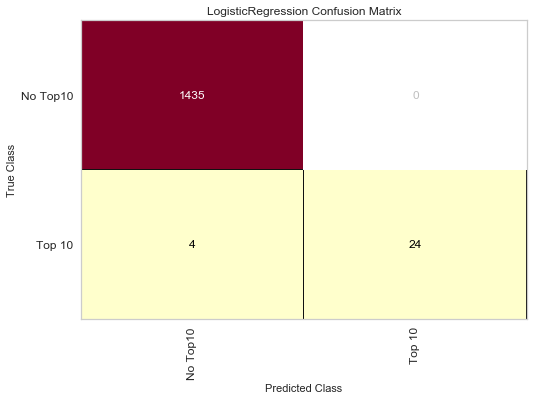

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy 99.72659

              precision    recall  f1-score   support

           0    0.99722   1.00000   0.99861      1435
           1    1.00000   0.85714   0.92308        28

    accuracy                        0.99727      1463
   macro avg    0.99861   0.92857   0.96084      1463
weighted avg    0.99727   0.99727   0.99716      1463


----------------NOW LET'S TEST THE SHANGHAI TOP 50--------------------

Logistic regression, k-fold 10 - Accuracy 98.687% (0.307%)
Logistic regression, k-fold 10 - Logloss 0.987 (0.003)
Logistic regression, k-fold 10 - AUC 0.987 (0.003)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[1294    9]
 [   9  151]]

Accuracy 98.76965
Accuracy check with conf. matrix 98.76965


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9876965140123035

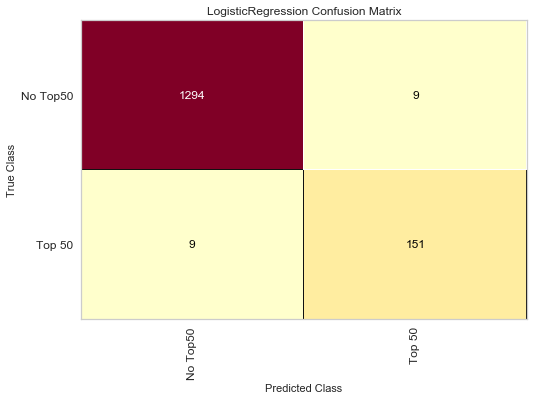

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy 98.76965

              precision    recall  f1-score   support

           0    0.99309   0.99309   0.99309      1303
           1    0.94375   0.94375   0.94375       160

    accuracy                        0.98770      1463
   macro avg    0.96842   0.96842   0.96842      1463
weighted avg    0.98770   0.98770   0.98770      1463



In [9]:
# a)For the Shanghai dataset evaluate accuracy, logloss, AUC, confusion matrix and classification report. Briefly discuss the diferences.
print("-----------------------------SHANGHAI DATA--------------------------")
sid = pd.read_csv('shanghaiData.csv')
sid = sid[pd.notnull(sid['ns'])]
sid['world_rank'] = sid['world_rank'].str.split('-').str.get(0).astype(int)
Xs=sid.iloc[:,4:10]
sid.head()


sid["top_10"]=sid["world_rank"].apply(lambda x: (1 if x<=10 else 0))
Ys = sid['top_10'].values

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from yellowbrick.classifier import PrecisionRecallCurve
print("LET'S TEST THE SHANGHAI TOP 10!!!")
print()
splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="accuracy"
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, Xs, Ys, scoring=scoring, cv=kfold)
print(f'Logistic regression, k-fold {splits:d} - Accuracy {results.mean()*100:.3f}% ({results.std()*100:.3f}%)')

scoring="neg_log_loss"
print(f'Logistic regression, k-fold {splits:d} - Logloss {results.mean():5.3f} ({results.std():5.3f})')

scoring="roc_auc"
print(f'Logistic regression, k-fold {splits:d} - AUC {results.mean():5.3f} ({results.std():5.3f})')


test_size=0.3
seed=7
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
c_matrix=confusion_matrix(y_test, y_predicted)
print("Confusion Matrix")
print(c_matrix)
print()
print(f'Accuracy {model.score(X_test, y_test)*100:.5f}')
print(f'Accuracy check with conf. matrix {(c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()*100:.5f}')
cm = ConfusionMatrix(model, classes=["No Top10","Top 10"])
cm.score(X_test, y_test)
cm.show()



X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)
report = classification_report(Y_test, Y_predicted, digits=5)
print(f'Accuracy {model.score(X_test, Y_test)*100:.5f}')
print()
print(report)
print()
print("----------------NOW LET'S TEST THE SHANGHAI TOP 50--------------------")
##############     TOP 50      ###############
print()
sid["top_50"]=sid["world_rank"].apply(lambda x: (1 if x<=50 else 0))
Ys = sid['top_50'].values

splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="accuracy"
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, Xs, Ys, scoring=scoring, cv=kfold)
print(f'Logistic regression, k-fold {splits:d} - Accuracy {results.mean()*100:.3f}% ({results.std()*100:.3f}%)')

scoring="neg_log_loss"
print(f'Logistic regression, k-fold {splits:d} - Logloss {results.mean():5.3f} ({results.std():5.3f})')

scoring="roc_auc"
print(f'Logistic regression, k-fold {splits:d} - AUC {results.mean():5.3f} ({results.std():5.3f})')


test_size=0.3
seed=7
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
c_matrix=confusion_matrix(y_test, y_predicted)
print("Confusion Matrix")
print(c_matrix)
print()
print(f'Accuracy {model.score(X_test, y_test)*100:.5f}')
print(f'Accuracy check with conf. matrix {(c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()*100:.5f}')
cm = ConfusionMatrix(model, classes=["No Top50","Top 50"])
cm.score(X_test, y_test)
cm.show()



X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)
report = classification_report(Y_test, Y_predicted, digits=5)
print(f'Accuracy {model.score(X_test, Y_test)*100:.5f}')
print()
print(report)


In [10]:
#When the set that ew have to predict gets larger, the accuracy and precision become lower!!

-----------------------------TIMES DATA--------------------------
----------------------------------------------


,world_rank,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students
0,1,99.7,72.4,98.7,98.8,34.5,20152.0,8.9,25.0
1,2,97.7,54.6,98.0,99.9,83.7,2243.0,6.9,27.0
2,3,97.8,82.3,91.4,99.9,87.5,11074.0,9.0,33.0
3,4,98.3,29.5,98.1,99.2,64.3,15596.0,7.8,22.0
5,6,90.5,77.7,94.1,94.0,57.0,18812.0,11.8,34.0


,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students
0,99.7,72.4,98.7,98.8,34.5,20152.0,8.9,25.0
1,97.7,54.6,98.0,99.9,83.7,2243.0,6.9,27.0
2,97.8,82.3,91.4,99.9,87.5,11074.0,9.0,33.0
3,98.3,29.5,98.1,99.2,64.3,15596.0,7.8,22.0
5,90.5,77.7,94.1,94.0,57.0,18812.0,11.8,34.0


LET'S TEST THE TIMES TOP 10!!!

Logistic regression, k-fold 10 - Accuracy 98.798% (1.395%)
Logistic regression, k-fold 10 - Logloss 0.988 (0.014)
Logistic regression, k-fold 10 - AUC 0.988 (0.014)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[680   3]
 [  7   9]]

Accuracy 98.56938
Accuracy check with conf. matrix 98.56938


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9856938483547926

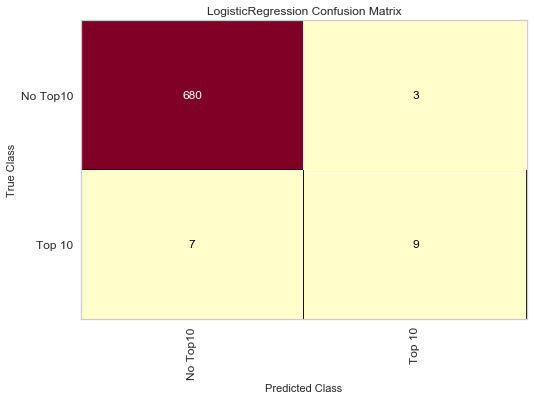

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy 98.76965

              precision    recall  f1-score   support

           0    0.99309   0.99309   0.99309      1303
           1    0.94375   0.94375   0.94375       160

    accuracy                        0.98770      1463
   macro avg    0.96842   0.96842   0.96842      1463
weighted avg    0.98770   0.98770   0.98770      1463


----------------NOW LET'S TEST THE TIMES TOP 50--------------------

Logistic regression, k-fold 10 - Accuracy 94.421% (5.560%)
Logistic regression, k-fold 10 - Logloss 0.944 (0.056)
Logistic regression, k-fold 10 - AUC 0.944 (0.056)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[606  10]
 [ 26  57]]

Accuracy 94.84979
Accuracy check with conf. matrix 94.84979


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9484978540772532

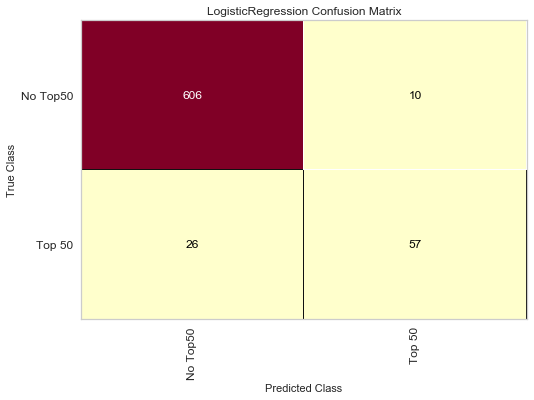

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy 94.84979

              precision    recall  f1-score   support

           0    0.95886   0.98377   0.97115       616
           1    0.85075   0.68675   0.76000        83

    accuracy                        0.94850       699
   macro avg    0.90480   0.83526   0.86558       699
weighted avg    0.94602   0.94850   0.94608       699



In [11]:
# b) Same for the Times ranking
print("-----------------------------TIMES DATA--------------------------")

originaltid = pd.read_csv('timesData.csv')
tid =originaltid.copy()

tid['world_rank'] = tid['world_rank'].str.split('-').str.get(0)
tid.world_rank.replace('=','', regex=True, inplace=True)  
print("----------------------------------------------")

tid.income = pd.to_numeric(tid.income, errors='coerce')
tid.international = pd.to_numeric(tid.international, errors='coerce')
tid.international_students.replace('%','', regex=True, inplace=True)    # \D
tid.international_students = pd.to_numeric(tid.international_students, errors='coerce')
tid.num_students = tid.num_students.astype(str)
tid['num_students'] = tid.num_students.apply(lambda x: x.replace(',', ''))
tid.num_students = pd.to_numeric(tid.num_students, errors='coerce')
tid.drop(['female_male_ratio','country','university_name','total_score','year'],axis=1,inplace=True)
tid.dropna(inplace=True)
tid.world_rank = pd.to_numeric(tid.world_rank, errors='coerce')
# tid["top_10"]=tid["world_rank"].apply(lambda x: (1 if x<=10 else 0))
tid.iloc[0:5,:]

Xt= tid.iloc[:,1:9]
Xt.head()


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from yellowbrick.classifier import PrecisionRecallCurve
print("LET'S TEST THE TIMES TOP 10!!!")
print()
tid["top_10"]=tid["world_rank"].apply(lambda x: (1 if x<=10 else 0))
Yt = tid["top_10"].values
splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="accuracy"
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, Xt, Yt, scoring=scoring, cv=kfold)
print(f'Logistic regression, k-fold {splits:d} - Accuracy {results.mean()*100:.3f}% ({results.std()*100:.3f}%)')

scoring="neg_log_loss"
print(f'Logistic regression, k-fold {splits:d} - Logloss {results.mean():5.3f} ({results.std():5.3f})')

scoring="roc_auc"
print(f'Logistic regression, k-fold {splits:d} - AUC {results.mean():5.3f} ({results.std():5.3f})')


test_size=0.3
seed=7
X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
c_matrix=confusion_matrix(y_test, y_predicted)
print("Confusion Matrix")
print(c_matrix)
print()
print(f'Accuracy {model.score(X_test, y_test)*100:.5f}')
print(f'Accuracy check with conf. matrix {(c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()*100:.5f}')
cm = ConfusionMatrix(model, classes=["No Top10","Top 10"])
cm.score(X_test, y_test)
cm.show()



X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)
report = classification_report(Y_test, Y_predicted, digits=5)
print(f'Accuracy {model.score(X_test, Y_test)*100:.5f}')
print()
print(report)
print()
print("----------------NOW LET'S TEST THE TIMES TOP 50--------------------")
##############     TOP 50      ###############
print()
tid["top_50"]=tid["world_rank"].apply(lambda x: (1 if x<=50 else 0))
Yt = tid['top_50'].values

splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="accuracy"
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, Xt, Yt, scoring=scoring, cv=kfold)
print(f'Logistic regression, k-fold {splits:d} - Accuracy {results.mean()*100:.3f}% ({results.std()*100:.3f}%)')

scoring="neg_log_loss"
print(f'Logistic regression, k-fold {splits:d} - Logloss {results.mean():5.3f} ({results.std():5.3f})')

scoring="roc_auc"
print(f'Logistic regression, k-fold {splits:d} - AUC {results.mean():5.3f} ({results.std():5.3f})')


test_size=0.3
seed=7
X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
c_matrix=confusion_matrix(y_test, y_predicted)
print("Confusion Matrix")
print(c_matrix)
print()
print(f'Accuracy {model.score(X_test, y_test)*100:.5f}')
print(f'Accuracy check with conf. matrix {(c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()*100:.5f}')
cm = ConfusionMatrix(model, classes=["No Top50","Top 50"])
cm.score(X_test, y_test)
cm.show()



X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)
report = classification_report(Y_test, Y_predicted, digits=5)
print(f'Accuracy {model.score(X_test, Y_test)*100:.5f}')
print()
print(report)

In [12]:
#We also notice that when the set that ew have to predict gets larger, the accuracy and precision become lower!!
#And also the predictions for Shanghai were more accurate!!

<h1> REGRESSION METRICS </h1>

We will review the three most common regression metrics,
<blockquote>
1) Mean Absolute Error (MAE).
<br>
2) Mean Square Error (MSE).
<br>
3) $R^2$


<img src="boston.jpg" width=1024>

<img src="Boston-Dataset-char.png">

In [13]:
# Load the Boston Housing dataset and separate input and output components 

from numpy import set_printoptions
set_printoptions(precision=3)

filename="HousingData.csv"
b_housing=pd.read_csv(filename)
b_housing.head()

b_housing.fillna(0,inplace=True) # we have NaN

# First we separate into input and output components
array=b_housing.values
X=array[:,0:13]
Y=array[:,13]
np.set_printoptions(suppress=True)
X
pd.DataFrame(X).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


array([[  0.006,  18.   ,   2.31 , ...,  15.3  , 396.9  ,   4.98 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 396.9  ,   9.14 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 392.83 ,   4.03 ],
       ...,
       [  0.061,   0.   ,  11.93 , ...,  21.   , 396.9  ,   5.64 ],
       [  0.11 ,   0.   ,  11.93 , ...,  21.   , 393.45 ,   6.48 ],
       [  0.047,   0.   ,  11.93 , ...,  21.   , 396.9  ,   7.88 ]])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,0.00


<h1>Mean Absolute Error</h1>

The MAE (Mean Absolute Error) is the sum of the absolute differences between the actual values and the predictions.

It provides an idea of the magnitude of the error but not of its direction. A 0 indicates a perfect prediction and like logloss this metric is inverted by the cross_val_score() function.


In [14]:
# Mean Absolute Error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

# KFold
kfold = KFold(n_splits=10, random_state=7)

#model
model = LinearRegression()

scoring = "neg_mean_absolute_error"
res = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(f'Boston Housing - Linear Regression, MAE: {res.mean():.3f} ({res.std():.3f})')

Boston Housing - Linear Regression, MAE: -3.975 (2.152)


<h1>Mean Squared Error</h1>

The idea of the MSE is the same of the MAE but we square the value in order to obtain always a positive value. Again, it provides an idea of the magnitude but not of the direction. 

Many times we use the RMSE (Root Mean Squared Error) in order to convert the units back to the original units of the output variable.   

Again this metric is inverted so results are increasing (scores that should be minimized are presented as negative while the ones that should be maximized as positive). 


In [15]:
# Mean Squared Error

import math 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

# KFold
kfold = KFold(n_splits=10, random_state=7)

#model
model = LinearRegression()

scoring = "neg_mean_squared_error"
res = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(f'Boston Housing - Linear Regression, MSE: {res.mean():.3f} ({res.std():.3f})')
print(f'Boston Housing - Linear Regression, MSE: {math.sqrt(abs(res.mean())):.3f} ({math.sqrt(res.std()):.3f})')

Boston Housing - Linear Regression, MSE: -34.090 (44.046)
Boston Housing - Linear Regression, MSE: 5.839 (6.637)


<h1>$R^2$</h1>

The coefficient of determination $R^2$ provides an indication of the goodness of the predictions.

It's a value of 0 and 1 for non-fit and perfect fit respectively. A value closer to 0 and less than 0.5 indicates a poor fit.


In [16]:
# R2

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

# KFold
kfold = KFold(n_splits=10, random_state=7)

#model
model = LinearRegression()

scoring = "r2"
res = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(f'Boston Housing - Linear Regression, R2: {res.mean():.3f} ({res.std():.3f})')


Boston Housing - Linear Regression, R2: 0.243 (0.573)
